NAME :-Dhanashri Bhatar Jadhav.
Domain: Data Analytics 


#            GOLD PRICE PREDICTION 


### 1 .Import Libraries
### 2 .Import Dataset
### 3 .Data Pre-processing
### 4 .Data Analysis
### 5 .Training and Test Dataset
### 6 . Model Building 

## 1.Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor


## 2.Import Dataset 

In [7]:
#Import Data
dataset = pd.read_csv("Gold_Price_Dataset.csv")


In [8]:
print(dataset)

           Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]


In [9]:
#top 10 rows from the dataset 
dataset.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


## 3.Data Pre-processing

In [10]:
#last 10 rows from the dataset 
dataset.tail(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
2280,4/30/2018,2648.050049,124.589996,13.8000,15.3800,1.208123
2281,5/1/2018,2654.800049,123.709999,13.6100,15.2400,1.199156
2282,5/2/2018,2635.669922,123.650002,13.6700,15.4200,1.195100
2283,5/3/2018,2629.729980,124.279999,13.8200,15.4600,1.198926
2284,5/7/2018,2672.629883,124.570000,14.1000,15.5200,1.193374
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [11]:
#Number of rows and columns
dataset.shape

(2290, 6)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [13]:
#Check if any nill value present in dataset 
dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

## 4.Data Analysis 

In [14]:
correlation = df.corr()
correlation


,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


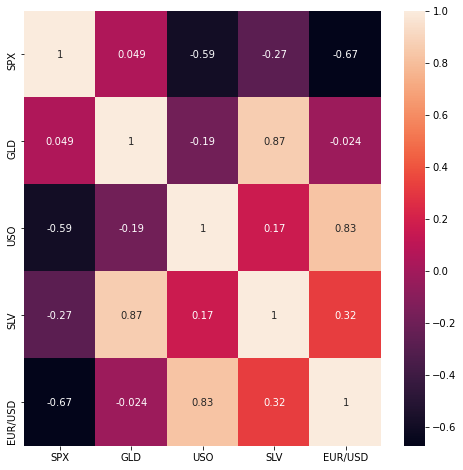

In [15]:

plt.figure(figsize=(8,8))
sns.heatmap(correlation,annot=True)

In [16]:
#Split dataset into Dependent and Independent Variables
X = df[['SPX','USO','SLV','EUR/USD']]
x = X.iloc[:,:].values

In [17]:
x

array([[1.44716003e+03, 7.84700010e+01, 1.51800000e+01, 1.47169200e+00],
       [1.44716003e+03, 7.83700030e+01, 1.52850000e+01, 1.47449100e+00],
       [1.41163000e+03, 7.73099980e+01, 1.51670000e+01, 1.47549200e+00],
       ...,
       [2.72307007e+03, 1.44100000e+01, 1.57400000e+01, 1.19175300e+00],
       [2.73012988e+03, 1.43800000e+01, 1.55600000e+01, 1.19311800e+00],
       [2.72578003e+03, 1.44058000e+01, 1.54542000e+01, 1.18203300e+00]])

In [18]:
y = df.iloc[:,2].values 


In [19]:
y

array([ 84.860001,  85.57    ,  85.129997, ..., 125.18    , 124.489998,
       122.5438  ])

## 5.Traning And Testing Data  

In [21]:
#Traning and testing data
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train.shape


(1832, 4)

In [22]:
x_test.shape

(458, 4)

In [23]:
y_train.shape

(1832,)

In [25]:
y_test.shape

(458,)

## 6. Build Model 

### Linear Regression Model 

In [26]:
#Linear Regression Model
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred = lr.predict(x_test)
y_pred

array([121.893539  , 142.52364868, 158.91453793, 114.2187805 ,
       110.36659025, 104.50331873, 109.98245681,  92.18483425,
       120.90649253, 123.318912  , 191.2074328 , 118.60055338,
       112.11950573,  93.46765189, 102.30779779,  97.98184003,
       118.85518215,  94.0029039 , 119.86781484, 116.59909644,
       122.21215189, 142.45378454, 121.22332281, 120.62860463,
       163.30049944, 104.70315921, 125.56912816,  87.10875178,
        95.73671386,  86.93309315, 121.81073623, 147.1233332 ,
       144.33048658, 121.95542705, 121.2464489 ,  94.5371824 ,
       152.31281012, 113.94185408, 110.92710898, 182.21152503,
        97.46373243, 128.50200625, 120.48416906, 140.20343573,
       120.16866258,  90.96452083,  82.43780029, 123.52782293,
       144.52004651, 113.76951398, 123.14800018, 159.28339044,
       141.34969761,  88.97598628, 163.39595336, 142.38892627,
       109.31495867, 119.81421995,  93.1108709 , 129.67869305,
       119.96744889, 142.21550112, 115.80809495, 115.07

In [28]:
accuracy = metrics.r2_score(y_test, y_pred)


In [29]:
print(accuracy)

0.8696713120900418


### Random Forest Model

In [31]:
#Random Forest Model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)


RandomForestRegressor()

In [32]:
y_pred = rf.predict(x_test)
y_pred
print('R-Squared Error for lr :', accuracy)


R-Squared Error for lr : 0.8696713120900418


In [33]:
accuracy = metrics.r2_score(y_test, y_pred)
print('R-Squared Error for rf :', accuracy)

R-Squared Error for rf : 0.9873023867149991


### Plot Between Actual and Predicted Value  

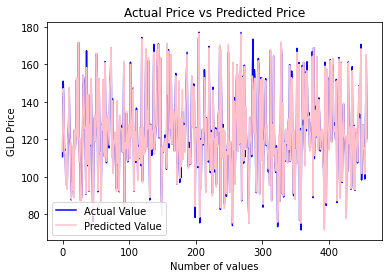

In [36]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='pink', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()